# 와인 데이터

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
print(wine_df.shape)
wine_df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [103]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = int(10e5), random_state = 2021)
kmeans.fit(wine_df)

KMeans(max_iter=1000000, n_clusters=2, random_state=2021)

In [104]:
pd.Series(kmeans.labels_).value_counts()

1    123
0     55
dtype: int64

In [116]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [105]:
wine_df['target'] = wine.target # 실제 target
wine_df['cluster'] = kmeans.labels_ # Clustering 결과

In [106]:
# 1-2, 0-0, 2-1 순으로 맞는 것 같지만 3개보다 더 나눠야 할듯
clustering_result = wine_df[['target','cluster']].value_counts()
clustering_result

target  cluster
1       1          67
0       0          50
2       1          47
0       1           9
1       0           4
2       0           1
dtype: int64

군집화 결과를 차원 축소하여 시각화

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

pca = PCA(n_components = 2)
wine_pca = pca.fit_transform(wine_std)

In [108]:
wine_df['pca_x'] = wine_pca[:, 0]
wine_df['pca_y'] = wine_pca[:, 1]
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831


엘보우 분석

In [109]:
def elbow(X):
    sse = []
    for i in range(1, 13):
        km = KMeans(n_clusters = i, init = 'k-means++', max_iter = int(10e5))
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,13), sse, marker='o')
    plt.xlabel('number of clusters')
    plt.ylabel('SSE')
    plt.show()

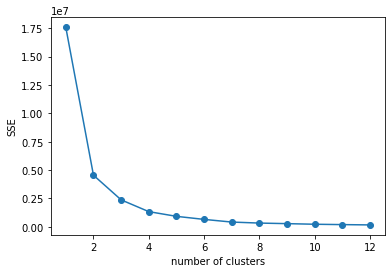

In [110]:
# SSE 값이 점점 줄어들다가 줄어드는 비율이 급격히 작아지는 부분(= 꺾이는 부분) 
# 클러스터 개수 2일 때가 최적
elbow(wine.data)

실루엣 분석

In [111]:
# 각 데이터마다 실루엣 계수를 구함
from sklearn.metrics import silhouette_score, silhouette_samples
# sample은 각 데이터에서 실루엣 계수를 구하는 것
# score는 그 평균
score_samples = silhouette_samples(wine.data, wine_df.cluster )
wine_df['실루엣 계수'] = score_samples
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣 계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463,0.671083
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393,0.658740
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151,0.732458
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372,0.620472
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831,0.544379


In [112]:
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features):    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

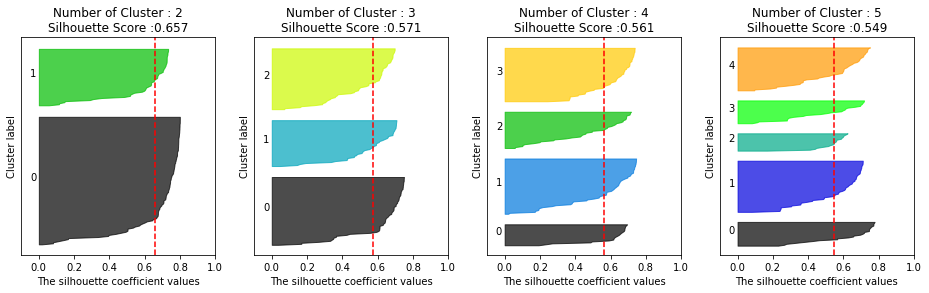

In [113]:
visualize_silhouette([2,3,4,5], wine.data)

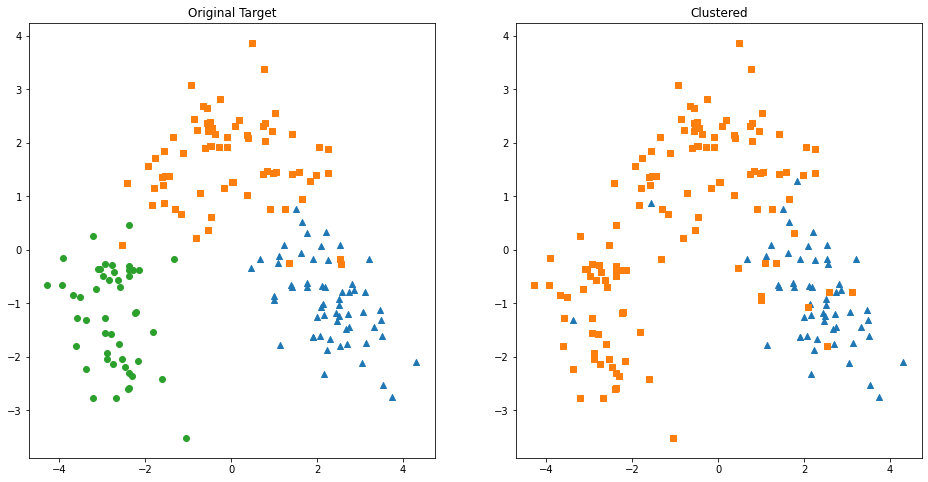

In [114]:
# subplots로 비교
fig, ax = plt.subplots( figsize=(16,8), ncols = 2, nrows = 1 )

markers = ['^',"s",'o']

# 실제 데이터
ax1 = plt.subplot(1, 2, 1)
# 군집화했을때
ax2 = plt.subplot(1, 2, 2)

for i, marker in enumerate(markers):
    x_axis_data = wine_df[wine_df.target == i]['pca_x']
    y_axis_data = wine_df[wine_df.target == i]['pca_y']
    ax1.scatter(x_axis_data, y_axis_data, marker = marker, label = wine.feature_names[i])

    x_axis_data = wine_df[wine_df.cluster == i]['pca_x']
    y_axis_data = wine_df[wine_df.cluster == i]['pca_y']
    ax2.scatter(x_axis_data, y_axis_data, marker = marker, label = wine.feature_names[i])

ax1.set_title('Original Target')
ax2.set_title('Clustered')
plt.show()

## 결론: <br>
- 와인 등급이 0등급, 1등급, 2등급으로 나와있었는데 elbow분석과 실루엣 분석, 차원축소 시각화에 따르면 3개 클러스터보다 2개 클러스터가 더 좋다는 결론이 나옴 <br>
- 0등급과 1등급, 2등급은 차이가 크지만 1등급, 2등급은 그렇게 차이가 크지 않아서 0등급 / 1,2등급으로 분류되는 것으로 보임